# PyTorch

## 설치 확인

In [2]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.1326, 0.5426, 0.8211],
        [0.9107, 0.6353, 0.7506],
        [0.5483, 0.2484, 0.6876],
        [0.2200, 0.7198, 0.1005],
        [0.2028, 0.8544, 0.5923]])


## 알아야 할 스킬

### 스칼라

In [4]:
scalar1 = torch.tensor([1.])
print(scalar1)

scalar2 = torch.tensor([3.])    
print(scalar2)

add_scalar = scalar1 + scalar2
print(add_scalar)

add_scalar = torch.add(scalar1, scalar2)
print(add_scalar)

tensor([1.])
tensor([3.])
tensor([4.])
tensor([4.])


### 벡터

In [5]:
vector1 = torch.tensor([1., 2., 3.])
vector2 = torch.tensor([4., 5., 6.])

add_vector = vector1 + vector2
print(add_vector)

add_vector = torch.add(vector1, vector2)
print(add_vector)

result = torch.dot(vector1, vector2)
print(result) #(1 * 4) +(2 * 5)十(3 * 6) = 4 + 10 + 18

tensor([5., 7., 9.])
tensor([5., 7., 9.])
tensor(32.)


### 행렬

In [6]:
matrix1 = torch.tensor([[1., 2.], [3., 4.]])
matrix2 = torch.tensor([[5., 6.], [7., 8.]])

sum_matrix = matrix1 + matrix2
print(sum_matrix)

sum_matrix = torch.add(matrix1, matrix2)
print(sum_matrix)

result = torch.matmul(matrix1, matrix2)
print(result)

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[19., 22.],
        [43., 50.]])


### 텐서

In [7]:
tensor1 = torch.tensor([[[1., 2.], [3., 4.]], [[5., 6.], [7., 8.]]])
tensor2 = torch.tensor([[[9., 10.], [11., 12.]], [[13., 14.], [15., 16.]]])

sum_tensor = tensor1 + tensor2
print(sum_tensor)

sum_tensor = torch.add(tensor1, tensor2)
print(sum_tensor)

result = torch.matmul(tensor1, tensor2)
print(result)

tensor([[[10., 12.],
         [14., 16.]],

        [[18., 20.],
         [22., 24.]]])
tensor([[[10., 12.],
         [14., 16.]],

        [[18., 20.],
         [22., 24.]]])
tensor([[[ 31.,  34.],
         [ 71.,  78.]],

        [[155., 166.],
         [211., 226.]]])


## AutoGrad

In [9]:
import torch

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

BATCH_SIZE = 64
INPUT_SIZE = 1000
HIDDEN_SIZE = 100
OUTPUT_SIZE = 10

x = torch.randn(BATCH_SIZE, 
                INPUT_SIZE, 
                device = DEVICE, 
                dtype = torch.float, 
                requires_grad = False)  

y = torch.randn(BATCH_SIZE, 
                OUTPUT_SIZE, 
                device = DEVICE,
                dtype = torch.float, 
                requires_grad = False)  

w1 = torch.randn(INPUT_SIZE, 
                 HIDDEN_SIZE, 
                 device = DEVICE, 
                 dtype = torch.float,
                 requires_grad = True)  

w2 = torch.randn(HIDDEN_SIZE,
                 OUTPUT_SIZE, 
                 device = DEVICE,
                 dtype = torch.float,
                 requires_grad = True)  

learning_rate = 1e-6                                           
for t in range(1, 501):                                        
    y_pred = x.mm(w1).clamp(min = 0).mm(w2)                    

    loss = (y_pred - y).pow(2).sum()                          
    if t % 100 == 0:
        print("Iteration: ", t, "\t", "Loss: ", loss.item()) 
    loss.backward()                                           

    with torch.no_grad():                                      
        w1 -= learning_rate * w1.grad                          
        w2 -= learning_rate * w2.grad                          

        w1.grad.zero_()                                      
        w2.grad.zero_()                                      

Iteration:  100 	 Loss:  466.50201416015625
Iteration:  200 	 Loss:  2.6096861362457275
Iteration:  300 	 Loss:  0.025071628391742706
Iteration:  400 	 Loss:  0.00048750650603324175
Iteration:  500 	 Loss:  5.5513286497443914e-05


## 사람의 손글씨 데이터인 MNIST를 이용해 Multi Layer Perceptron 설계하기

### import

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#딥러닝 프레임워크 중 하나인 파이토치의 기본 모듈
import torch
#PyTorch Module 중 딥러닝 모델을 설계할 때 필요한 함수를 모아놓은 모듈
import torch.nn as nn
#torch.nn Module 중에서도 자주 이용되는 함수를 ‘F’로 지정
import torch.nn.functional as F
#컴퓨터 비전 연구 분야에서 자주 이용하는 ‘torchvision’ 모듈 내 ‘transforms’, ‘datasets’ 함수를 임포트
from torchvision import transforms, datasets

### 장비 확인

In [12]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 1.9.0  Device: cpu


### 데이터 가져오기

In [14]:
BATCH_SIZE = 32
EPOCHS = 10

'''  MNIST 데이터 다운로드 (Train set, Test set 분리하기) '''
train_dataset = datasets.MNIST(root = "./data/MNIST",
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())

test_dataset = datasets.MNIST(root = "./data/MNIST",
                              train = False,
                              transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

### 데이터 확인

In [15]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


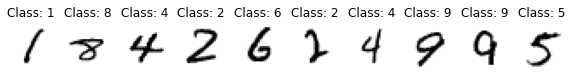

In [16]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap = "gray_r")
    plt.title('Class: ' + str(y_train[i].item()))

### 모델 설계

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

### Optimizer, Objective Function 설정

In [18]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


### MLP 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의 

In [19]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))

### 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의

In [20]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

### MLP 학습 실행하며 Train, Test set의 Loss 및 Test set Accuracy 확인하기

In [21]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

/Users/adam/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.362509
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 2.301513
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 2.306078
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 2.284310
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 2.254467
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 2.341054
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 2.249018
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 2.269433
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 2.270044
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 2.285470

[EPOCH: 1], 	Test Loss: 0.0699, 	Test Accuracy: 19.09 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 2.236102
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 2.203509
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 2.190075
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 2.113278
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 2.036448
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 1.752476
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 1.818949
T